In [1]:
# %% [markdown]
# ## 1. Imports and paths

# %%
import pandas as pd
import numpy as np
from collections import Counter

# paths (adjust if needed)
PAIRS_CSV = "tf_gene_pairs_with_promoters_flank1000.csv"
PROMOTER_FASTA = "promoters_flank1000.fasta"


In [2]:
# %% [markdown]
# ## 2. Load tf_gene_pairs_with_promoters_flank1000.csv

# %%
pairs = pd.read_csv(PAIRS_CSV)
pairs.head()


,TF,gene,expr,promoter_seq
0,AFF1,DPM1,-0.068800,TACTCGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGG...
1,ALX4,DPM1,-0.107178,TACTCGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGG...
2,ARID1A,DPM1,-0.221361,TACTCGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGG...
3,ARID3A,DPM1,0.031947,TACTCGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGG...
4,BARX1,DPM1,-0.118612,TACTCGGGAGGCTGAGGCAGGAGAATGGCATGAACCTGGGAGGCGG...


In [3]:
# %%
pairs.shape


(1028364, 4)

In [4]:
# %%
pairs.columns


Index(['TF', 'gene', 'expr', 'promoter_seq'], dtype='object')

Expected:

Rows ≈ 1,046,682

Unique TFs = 213

Unique genes = 4914

We lost a few genes due to being unavailable in the sequence annotations we pulled from, so we have a little fewer

In [5]:
# %% [markdown]
# ## 3. Unique TFs and genes

# %%
n_tfs = pairs["TF"].nunique()
n_genes = pairs["gene"].nunique()
n_rows = len(pairs)

print(f"Rows: {n_rows}")
print(f"Unique TFs: {n_tfs}")
print(f"Unique genes: {n_genes}")


Rows: 1028364
Unique TFs: 213
Unique genes: 4828


In [6]:
# %%
tf_counts = pairs["TF"].value_counts()
print("Top 10 TFs by number of gene rows:")
print(tf_counts.head(10))

print("\nBottom 10 TFs by number of gene rows:")
print(tf_counts.tail(10))

gene_counts = pairs["gene"].value_counts()
print("\nTop 10 genes by number of TF rows:")
print(gene_counts.head(10))


Top 10 TFs by number of gene rows:
TF
AFF1       4828
ALX4       4828
ARID1A     4828
ARID3A     4828
BARX1      4828
BBX        4828
BCL6       4828
BCL11A     4828
BCL11B     4828
BHLHE41    4828
Name: count, dtype: int64

Bottom 10 TFs by number of gene rows:
TF
ZIC2       4828
ZKSCAN7    4828
ZNF296     4828
ZNF304     4828
ZNF512B    4828
ZNF618     4828
ZNF697     4828
ZNF711     4828
ZNF777     4828
ZNF827     4828
Name: count, dtype: int64

Top 10 genes by number of TF rows:
gene
POLR2J3    213
DPM1       213
FUCA2      213
NIPAL3     213
ANKIB1     213
CYP51A1    213
KRIT1      213
BAD        213
LAP3       213
CD99       213
Name: count, dtype: int64


In [7]:
# %%
print("Value counts of TF row counts (should mostly be 4828):")
print(tf_counts.value_counts().head())


Value counts of TF row counts (should mostly be 4828):
count
4828    213
Name: count, dtype: int64


In [8]:
# %% [markdown]
# ## 4. Expression / label sanity

# %%
pairs["expr"].describe()


count    1.028364e+06
mean    -2.393232e-02
std      1.822913e-01
min     -2.267556e+00
25%     -1.228078e-01
50%     -2.998312e-02
75%      6.454267e-02
max      1.274326e+01
Name: expr, dtype: float64

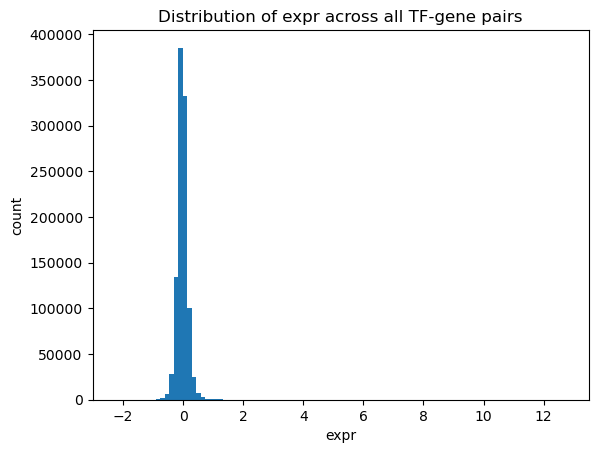

In [9]:
# %%
import matplotlib.pyplot as plt

plt.hist(pairs["expr"], bins=100)
plt.xlabel("expr")
plt.ylabel("count")
plt.title("Distribution of expr across all TF-gene pairs")
plt.show()


In [10]:
# %% [markdown]
# ## 5. promoter_seq completeness

# %%
n_missing_prom = pairs["promoter_seq"].isna().sum()
print("Missing promoter_seq rows:", n_missing_prom)


Missing promoter_seq rows: 0


In [11]:
# %% [markdown]
# ## 6. Promoter sequence length checks

# %%
seq_lengths = pairs["promoter_seq"].str.len()
seq_lengths.describe()


count    1028364.0
mean        2000.0
std            0.0
min         2000.0
25%         2000.0
50%         2000.0
75%         2000.0
max         2000.0
Name: promoter_seq, dtype: float64

In [12]:
# %%
length_counts = seq_lengths.value_counts()
print("Promoter length distribution (top 10):")
print(length_counts.head(10))


Promoter length distribution (top 10):
promoter_seq
2000    1028364
Name: count, dtype: int64


In [13]:
# %% [markdown]
# ## 7. Check promoter consistency per gene

# %%
# Compute number of unique promoter sequences per gene
n_unique_promoters_per_gene = (
    pairs.groupby("gene")["promoter_seq"]
    .nunique()
)

print("Unique promoter sequences per gene (value counts):")
print(n_unique_promoters_per_gene.value_counts().head(10))

# Any gene with more than 1 unique promoter?
weird_genes = n_unique_promoters_per_gene[n_unique_promoters_per_gene > 1]
print("\nGenes with >1 unique promoter sequence:", len(weird_genes))
if len(weird_genes) > 0:
    print(weird_genes.head())


Unique promoter sequences per gene (value counts):
promoter_seq
1    4828
Name: count, dtype: int64

Genes with >1 unique promoter sequence: 0


In [14]:
# %% [markdown]
# ## 8. Spot-check a random sample of rows

# %%
pairs.sample(5, random_state=42)


,TF,gene,expr,promoter_seq
589983,TLX1,RNF145,0.117758,TCTCTTTTTCAAAATGGTATGATACAGAGGTGTCATATAAATCTTA...
511551,PHOX2A,TPMT,-0.023523,GTTCCTACTCCAGGACCGTGGGGTTCTCCCGCGGCTCTGACAGTCC...
1021459,NOTO,MRPS21,0.010917,CTACTTTGTTTTAGTATCTTTTATGTGGTCCTAGTGGTCCAGGAGG...
939194,HOXC13,PSAP,0.603767,TGACCAAGCTGATTGACAACAACAAGACTGAGGTATGCTGTCCTCC...
982854,HOXA6,IRF9,0.206426,CCAGGGCACACTACAAAGAGTATCTTGTGAGCCTCATCAATGCCCA...


In [15]:
# %% [markdown]
# ## 9. Check promoter sequence alphabet

# %%
def char_counts(seq_series, max_seqs=10000):
    # sample to save time
    sample = seq_series.sample(min(max_seqs, len(seq_series)), random_state=0)
    counter = Counter("".join(sample.tolist()))
    return counter

alphabet_counts = char_counts(pairs["promoter_seq"])
alphabet_counts


Counter({'G': 5292492, 'C': 5076346, 'T': 4970836, 'A': 4660324, 'N': 2})

In [16]:
# %% [markdown]
# ## 10. Sanity check promoters_flank1000.fasta

# %%
fasta_seqs = {}
current_gene = None
current_seq_chunks = []

with open(PROMOTER_FASTA, "r") as fh:
    for line in fh:
        line = line.strip()
        if not line:
            continue
        if line.startswith(">"):
            # save previous
            if current_gene is not None:
                fasta_seqs[current_gene] = "".join(current_seq_chunks)
            # new gene
            current_gene = line[1:].strip()  # remove '>'
            current_seq_chunks = []
        else:
            current_seq_chunks.append(line)

# save last
if current_gene is not None:
    fasta_seqs[current_gene] = "".join(current_seq_chunks)

print(f"Genes in FASTA: {len(fasta_seqs)}")

# Compare to gene set in pairs
genes_in_pairs = set(pairs["gene"].unique())
genes_in_fasta = set(fasta_seqs.keys())

print("Genes in pairs but not in FASTA:", len(genes_in_pairs - genes_in_fasta))
print("Genes in FASTA but not in pairs:", len(genes_in_fasta - genes_in_pairs))


Genes in FASTA: 4828
Genes in pairs but not in FASTA: 0
Genes in FASTA but not in pairs: 0


In [17]:
# %% [markdown]
# ## 11. Spot-check consistency between CSV and FASTA

# %%
common_genes = genes_in_pairs & genes_in_fasta
print("Number of common genes:", len(common_genes))

sample_genes = list(sorted(common_genes))[:5]  # pick 5 arbitrary genes

for g in sample_genes:
    seq_csv = pairs.loc[pairs["gene"] == g, "promoter_seq"].iloc[0]
    seq_fasta = fasta_seqs[g]
    print(f"\nGene: {g}")
    print("  Length CSV:", len(seq_csv))
    print("  Length FASTA:", len(seq_fasta))
    print("  Seqs equal?:", seq_csv == seq_fasta)


Number of common genes: 4828

Gene: A1BG
  Length CSV: 2000
  Length FASTA: 2000
  Seqs equal?: True

Gene: AAK1
  Length CSV: 2000
  Length FASTA: 2000
  Seqs equal?: True

Gene: AAMDC
  Length CSV: 2000
  Length FASTA: 2000
  Seqs equal?: True

Gene: AAMP
  Length CSV: 2000
  Length FASTA: 2000
  Seqs equal?: True

Gene: AARSD1
  Length CSV: 2000
  Length FASTA: 2000
  Seqs equal?: True
